<a href="https://colab.research.google.com/github/Lijun56/Kaggle_Titanic_Challenge/blob/main/Titanic_Survival_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

titanic_path = kagglehub.competition_download('titanic')

print('Data source import complete.')


100%|██████████| 34.1k/34.1k [00:00<00:00, 21.5MB/s]

Extracting files...
Data source import complete.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk(titanic_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/competitions/titanic/train.csv
/root/.cache/kagglehub/competitions/titanic/gender_submission.csv
/root/.cache/kagglehub/competitions/titanic/test.csv


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

train = pd.read_csv('/root/.cache/kagglehub/competitions/titanic/train.csv')
test = pd.read_csv('/root/.cache/kagglehub/competitions/titanic/test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- numeric value: Age, SibSp, Parch, Fare
- categorical value: Pclass, Ticket, Cabin, Embarked, Sex
- String type : Name
- target : Survived

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


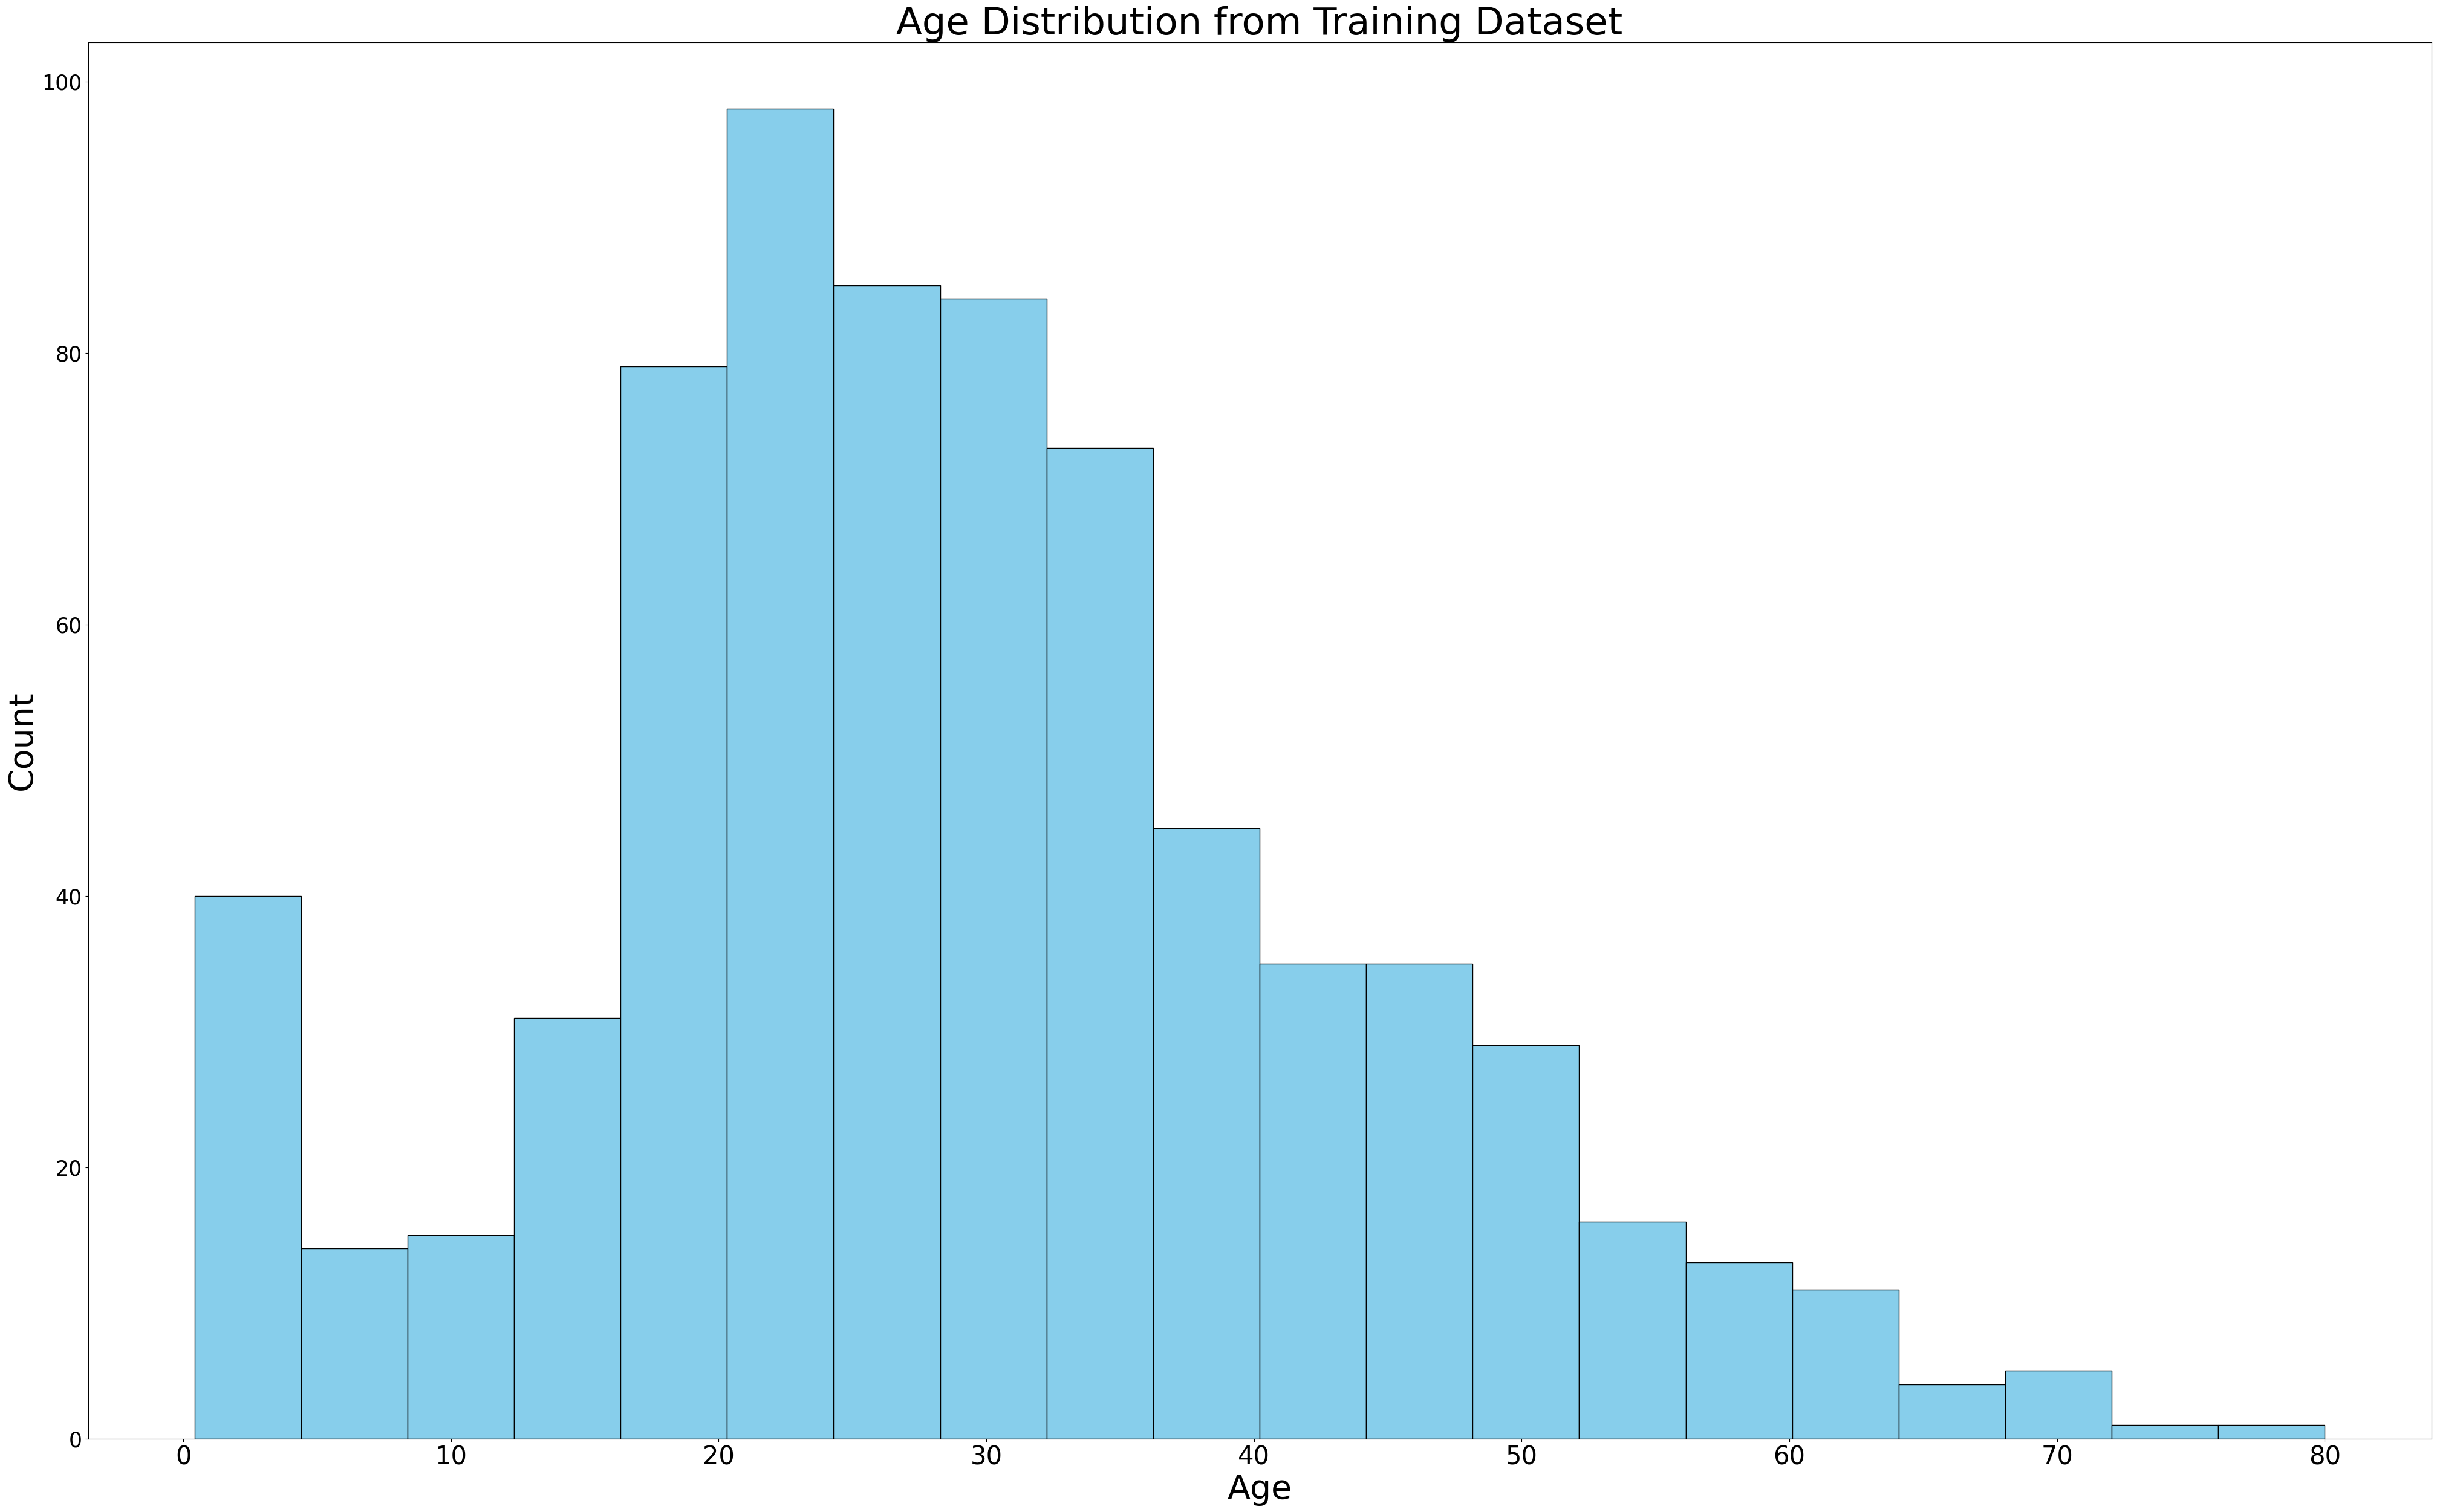

In [ ]:
# Age need to transfer to numeric value from categorical value
ageCounts = train["Age"].sort_values(ascending = False)

plt.figure(figsize = (50, 30))
plt.hist(train["Age"], bins = 20, color = "skyblue", edgecolor = "black")
plt.title("Age Distribution from Training Dataset", fontsize = 45)
plt.xlabel("Age", fontsize = 40)
plt.xticks(fontsize = 30)
plt.ylabel("Count", fontsize = 40)
plt.yticks(fontsize = 25)
plt.show()

In [ ]:
train.isnull().sum(0)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:

train['Age'] = train['Age'].fillna(-1.0)
test['Age'] = test['Age'].fillna(-1.0)

train['AgeGroup'] = pd.cut(train['Age'], [-1, 0, 5, 12, 18, 24, 60, np.inf],
      labels = ['Unkonwn', 'Toddler', 'Child', 'Teenager', 'Youth', 'Adult', 'Senior'])

test['AgeGroup'] = pd.cut(test['Age'], [-1, 0, 5, 12, 18, 24, 60, np.inf],
      labels = ['Unkonwn', 'Toddler', 'Child', 'Teenager', 'Youth', 'Adult', 'Senior'])

In [ ]:
# people with title is related to survived rate, so extract title from name
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')

In [ ]:
# Remove Age, Name and Ticket, as we get title, AgeGroup.
# Drop the Ticket number as it is not related to the suvival rate
train = train.drop(['Name','Ticket','Age'], axis=1)
test = test.drop(['Name','Ticket','Age'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
lbl.fit(train['Sex'])
train['Sex'] = lbl.transform(train['Sex'])
test['Sex'] = lbl.transform(test['Sex'])

In [ ]:
for col in ['Cabin', 'Embarked', 'AgeGroup', 'Title']:
    lbl = LabelEncoder()
    train[col] = train[col].astype(object)
    test[col] = test[col].astype(object)

    train[col] = train[col].fillna('-1')
    test[col] = test[col].fillna('-1')

    lbl.fit(list(train[col]) + list(test[col])) #

    train[col] = lbl.transform(train[col])
    test[col] = lbl.transform(test[col])

In [ ]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,1,1,0,7.2500,0,3,6,13
1,2,1,1,0,1,0,71.2833,107,1,1,14
2,3,1,3,0,0,0,7.9250,0,3,1,10
3,4,1,1,0,1,0,53.1000,71,3,1,14
4,5,0,3,1,0,0,8.0500,0,3,1,13
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,13.0000,0,3,1,16
887,888,1,1,0,0,0,30.0000,41,3,6,10
888,889,0,3,0,1,2,23.4500,0,3,0,10
889,890,1,1,1,0,0,30.0000,78,1,1,13


In [ ]:
train.isnull().sum(0)

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0
AgeGroup,0


In [ ]:
test.isnull().sum(0)

,0
PassengerId,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,1
Cabin,0
Embarked,0
AgeGroup,0
Title,0


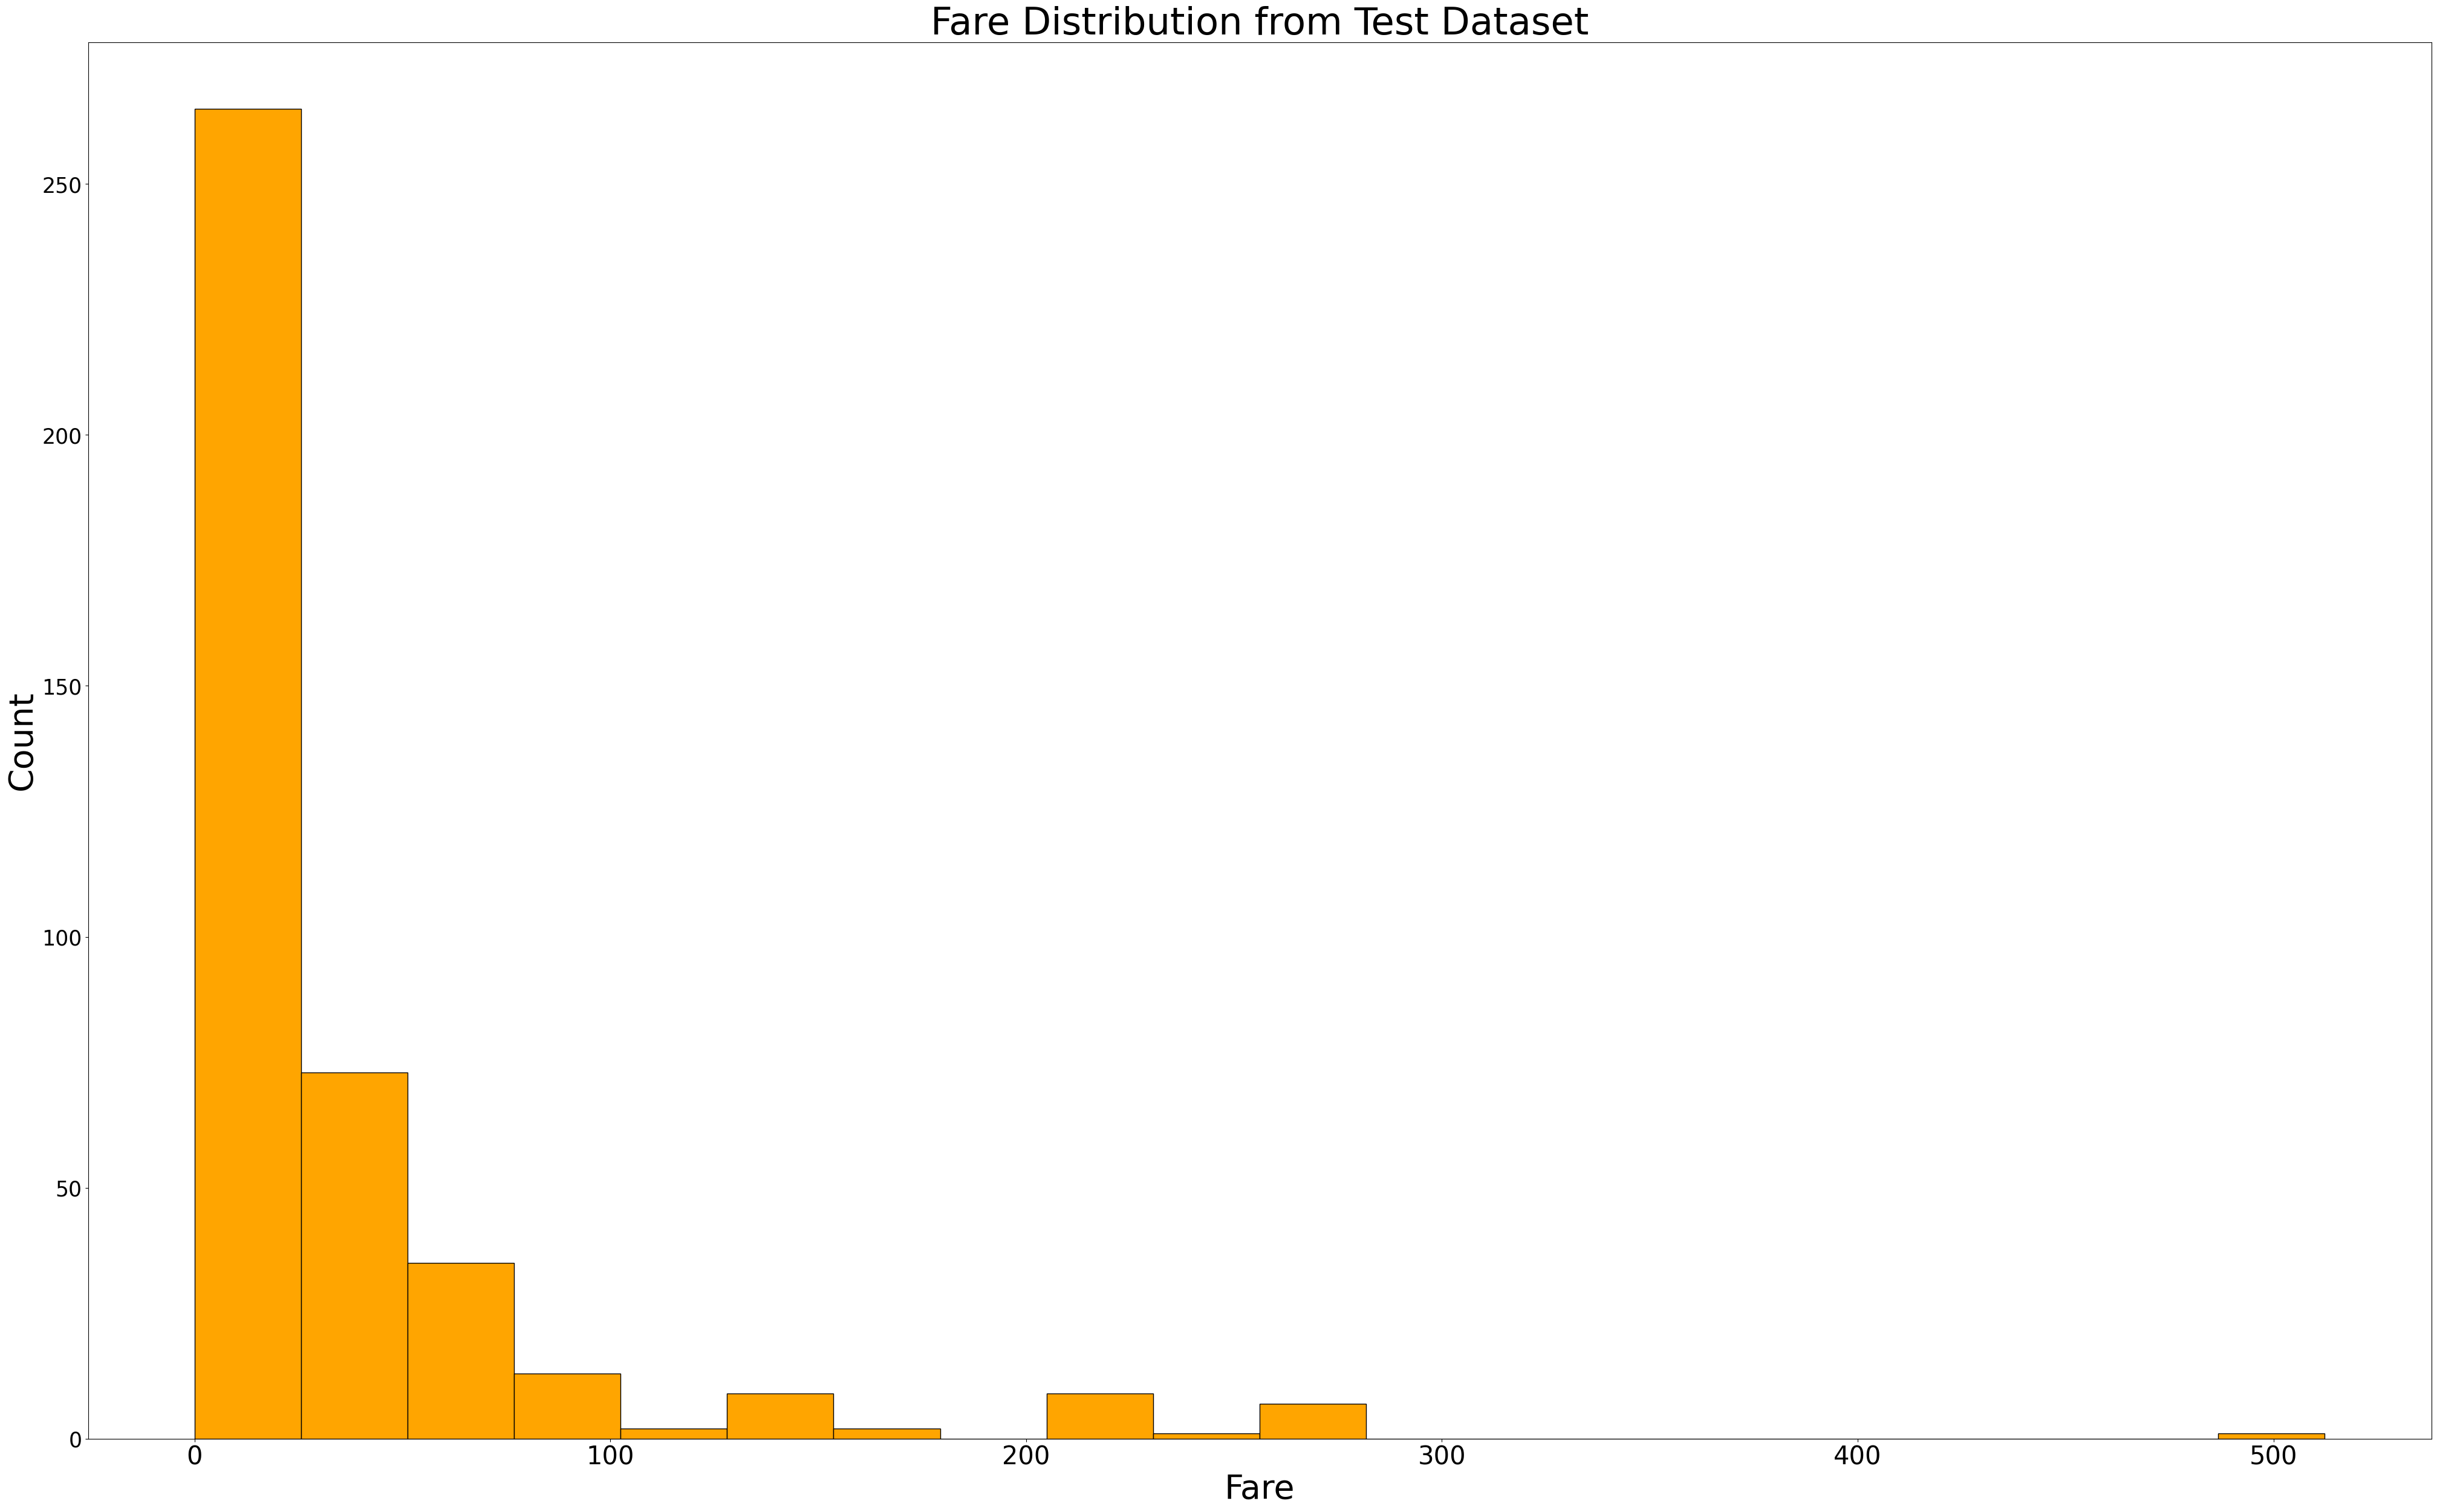

In [ ]:
# Would it make more sense to replace this out with the mean or the median?
# Looks like we need another histogram
# need to visualize how badly the test data needs cleaning
fareCounts = test["Fare"].sort_values(ascending = False)

plt.figure(figsize = (50, 30))
plt.hist(test["Fare"], bins = 20, color = "orange", edgecolor = "black")
plt.title("Fare Distribution from Test Dataset", fontsize = 45)
plt.xlabel("Fare", fontsize = 40)
plt.xticks(fontsize = 30)
plt.ylabel("Count", fontsize = 40)
plt.yticks(fontsize = 25)
plt.show()

In [ ]:
# the skewed distribution make more sense to median value instead of mean.
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [ ]:
test.isnull().sum(0)

,0
PassengerId,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0
AgeGroup,0
Title,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train.drop(['PassengerId','Survived'], axis=1),
                                                 train['Survived'])

In [ ]:
x_train.shape, x_val.shape

((668, 9), (223, 9))

In [ ]:
# Model 1: K-Nearest Neighbors
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(x_train, y_train)
knn_best = knn_grid.best_estimator_
knn_val_pred = knn_best.predict(x_val)
knn_val_accuracy = accuracy_score(y_val, knn_val_pred)



In [ ]:
print(f"knn_val_accuracy: {knn_val_accuracy*100}")

knn_val_accuracy: 74.88789237668162


In [ ]:
# print the best parameter
print(f"Best parameter: {knn_grid.best_params_}")

Best parameter: {'n_neighbors': 7, 'weights': 'uniform'}


KNN Grid Search Results:


,param_n_neighbors,param_weights,mean_test_score,rank_test_score
4,7,uniform,0.756088,1
2,5,uniform,0.739659,2
5,7,distance,0.732084,3
3,5,distance,0.721647,4
1,3,distance,0.699170,5
0,3,uniform,0.693188,6


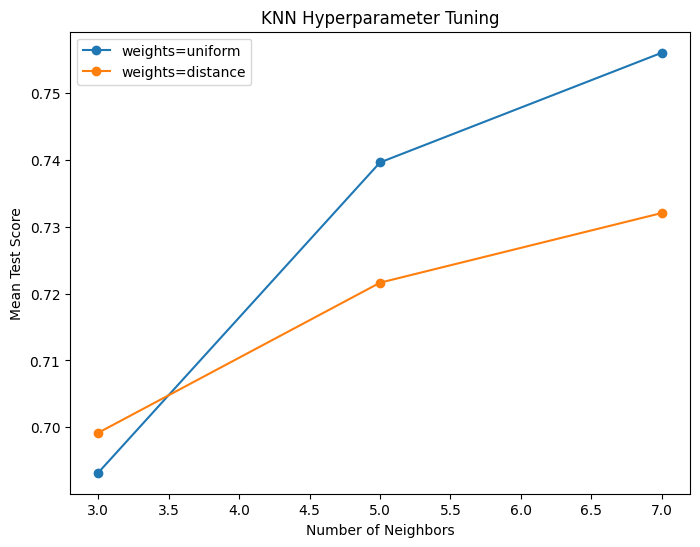

Best hyperparameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validated accuracy: 75.61%


In [ ]:
knn_results = pd.DataFrame(knn_grid.cv_results_)

# Display the hyperparameter values
print("KNN Grid Search Results:")
display(knn_results[['param_n_neighbors', 'param_weights', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score'))

# Plot mean test score vs. n_neighbors for each weight type
plt.figure(figsize=(8,6))
for weight in knn_params['weights']:
    subset = knn_results[knn_results['param_weights'] == weight]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], marker='o', label=f'weights={weight}')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('KNN Hyperparameter Tuning')
plt.legend()
plt.show()

# Indicate the best hyperparameters
print(f"Best hyperparameters: {knn_grid.best_params_}")
print(f"Best cross-validated accuracy: {knn_grid.best_score_ * 100:.2f}%")

In [ ]:
rf_params = {'n_estimators': [100, 200],
             'max_depth': [None, 5, 10],
             'min_samples_split': [2, 5]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(x_train, y_train)

rf_best = rf_grid.best_estimator_
rf_val_pred = rf_best.predict(x_val)
rf_val_accuracy = accuracy_score(y_val, rf_val_pred)
print(f"rf_val_accuracy: {rf_val_accuracy*100}")

rf_val_accuracy: 83.40807174887892


Random Forest Grid Search Results:


,param_n_estimators,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
4,100,5,2,0.824947,1
6,100,5,5,0.820435,2
10,100,10,5,0.818988,3
11,200,10,5,0.814510,4
7,200,5,5,0.814465,5
5,200,5,2,0.812973,6
3,200,None,5,0.805521,7
8,100,10,2,0.805521,7
9,200,10,2,0.801032,9
2,100,None,5,0.801021,10


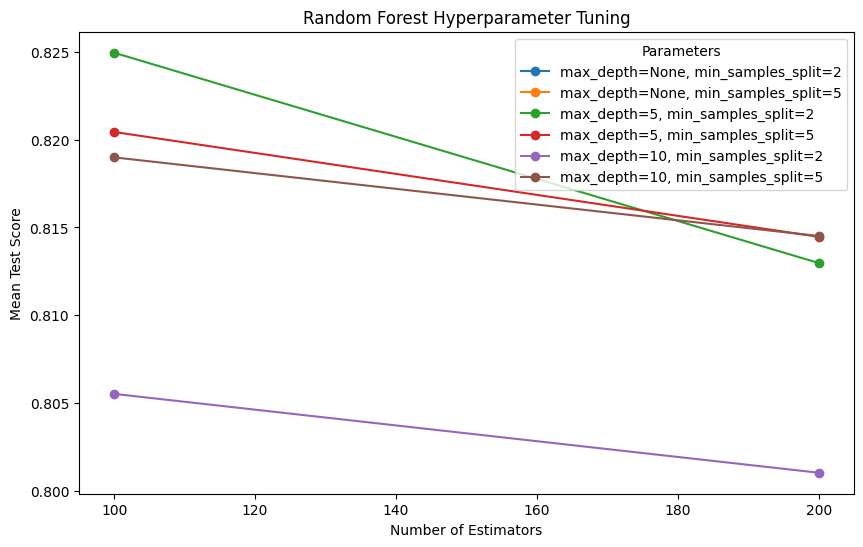

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy: 82.49%


In [ ]:
rf_results = pd.DataFrame(rf_grid.cv_results_)

# Display hyperparameter values
print("Random Forest Grid Search Results:")
display(rf_results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score'))

# Plot mean test score vs. n_estimators for each combination of max_depth and min_samples_split
plt.figure(figsize=(10,6))
for max_depth in rf_params['max_depth']:
    for min_samples_split in rf_params['min_samples_split']:
        subset = rf_results[(rf_results['param_max_depth'] == max_depth) & (rf_results['param_min_samples_split'] == min_samples_split)]
        plt.plot(subset['param_n_estimators'], subset['mean_test_score'], marker='o',
                 label=f'max_depth={max_depth}, min_samples_split={min_samples_split}')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.title('Random Forest Hyperparameter Tuning')
plt.legend(title='Parameters')
plt.show()

# Indicate the best hyperparameters
print(f"Best hyperparameters: {rf_grid.best_params_}")
print(f"Best cross-validated accuracy: {rf_grid.best_score_ * 100:.2f}%")

In [ ]:
mlp_params = {'hidden_layer_sizes': [(50,), (100,), (50,50)],
              'activation': ['relu', 'tanh'],
              'solver': ['adam'],
              'alpha': [0.0001, 0.001]}
mlp = MLPClassifier(max_iter=500, random_state=42)
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5)
mlp_grid.fit(x_train, y_train)

mlp_best = mlp_grid.best_estimator_
mlp_val_pred = mlp_best.predict(x_val)
mlp_val_accuracy = accuracy_score(y_val, mlp_val_pred)
print(f"mlp_val_accuracy: {mlp_val_accuracy*100}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

mlp_val_accuracy: 80.26905829596413


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Grid Search Results:


,param_hidden_layer_sizes,param_activation,param_alpha,mean_test_score,rank_test_score
10,"(100,)",tanh,0.0010,0.786029,1
7,"(100,)",tanh,0.0001,0.786017,2
3,"(50,)",relu,0.0010,0.782987,3
5,"(50, 50)",relu,0.0010,0.780013,4
4,"(100,)",relu,0.0010,0.780002,5
9,"(50,)",tanh,0.0010,0.778543,6
2,"(50, 50)",relu,0.0001,0.778532,7
6,"(50,)",tanh,0.0001,0.778532,7
0,"(50,)",relu,0.0001,0.778498,9
1,"(100,)",relu,0.0001,0.775536,10


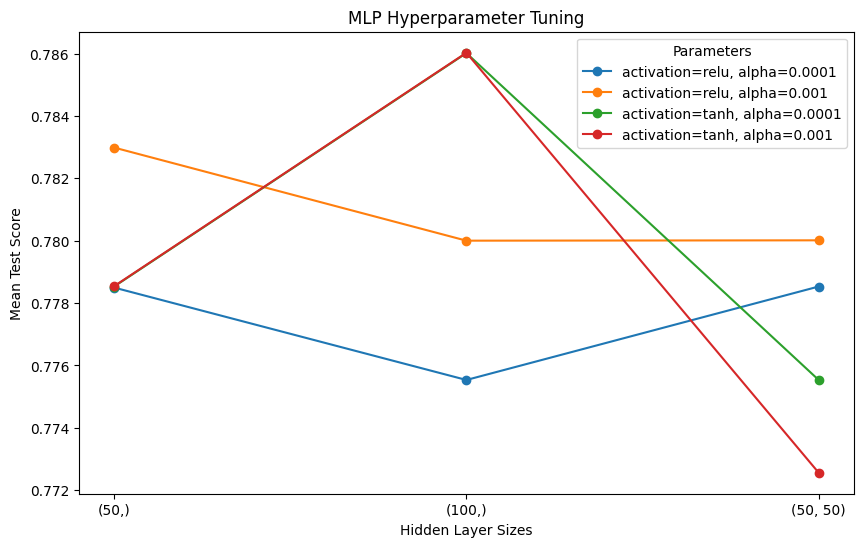

Best hyperparameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best cross-validated accuracy: 78.60%


In [ ]:
mlp_results = pd.DataFrame(mlp_grid.cv_results_)

# Display hyperparameter values with their mean test scores
print("MLP Grid Search Results:")
display(mlp_results[['param_hidden_layer_sizes', 'param_activation', 'param_alpha', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score'))

# Plot mean test score vs. hidden_layer_sizes for each activation and alpha
plt.figure(figsize=(10,6))
for activation in mlp_params['activation']:
    for alpha in mlp_params['alpha']:
        subset = mlp_results[(mlp_results['param_activation'] == activation) & (mlp_results['param_alpha'] == alpha)]
        plt.plot(subset['param_hidden_layer_sizes'].astype(str), subset['mean_test_score'], marker='o',
                 label=f'activation={activation}, alpha={alpha}')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Test Score')
plt.title('MLP Hyperparameter Tuning')
plt.legend(title='Parameters')
plt.show()

# Indicate the best hyperparameters
print(f"Best hyperparameters: {mlp_grid.best_params_}")
print(f"Best cross-validated accuracy: {mlp_grid.best_score_ * 100:.2f}%")

In [ ]:
best_scores = {
    'KNN': knn_grid.best_score_,
    'Random Forest': rf_grid.best_score_,
    'MLP': mlp_grid.best_score_
}

best_model = max(best_scores, key=best_scores.get)
print(f"The best model is {best_model} with a mean cross-validated accuracy of {best_scores[best_model]*100:.2f}%")

The best model is Random Forest with a mean cross-validated accuracy of 82.49%
